In [1]:
import pandas as pd
import numpy as np
import upsetplot as ups
import matplotlib.pyplot as plt

## Importing and preparing data

In [3]:
path = 'C:\\Users\\jenny\\Documents\\NTNU\\Master\\my_supplementary_data\\database\\prepared_data\\'

bacdive_df = pd.read_csv(path+'bacdive.csv', sep = ';')
bergeys_df = pd.read_csv(path+'bergeys.csv', sep = ';')
campedelli_df = pd.read_csv(path+'campedelli.csv', sep = ';')
corkrey_df = pd.read_csv(path+'corkrey.csv', sep = ';')
faprotax_df = pd.read_csv(path+'faprotax.csv', sep = ';')
ijsem_df = pd.read_csv(path+'ijsem.csv', sep = ';')
jgi_df = pd.read_csv(path+'jgi.csv', sep = ';')
kremer_df = pd.read_csv(path+'kremer.csv', sep = ';')
mason_df = pd.read_csv(path+'mason.csv', sep = ';')
mediadb_df = pd.read_csv(path+'mediadb.csv', sep = ';')
microbedir_df = pd.read_csv(path+'microbedir.csv', sep = ';')
moore_df = pd.read_csv(path+'moore.csv', sep = ';')
nielsen_df = pd.read_csv(path+'nielsen.csv', sep = ';')
pasteur_df = pd.read_csv(path+'pasteur.csv', sep = ';')
patric_df = pd.read_csv(path+'patric.csv', sep = ';')
phymet_df = pd.read_csv(path+'phymet.csv', sep = ';')
protraits_df = pd.read_csv(path+'protraits.csv', sep = ';')
refseq_df = pd.read_csv(path+'refseq.csv', sep = ';')
vieirasilva_df = pd.read_csv(path+'vieira_silva.csv', sep = ';')

In [4]:
db = [bacdive_df, bergeys_df, campedelli_df, corkrey_df, faprotax_df, ijsem_df, jgi_df, kremer_df, mason_df,
      mediadb_df, microbedir_df, moore_df, nielsen_df, pasteur_df, patric_df, phymet_df, protraits_df,
      refseq_df, vieirasilva_df]

In [6]:
# count data points for each field in the databases
counts = pd.DataFrame()
for i in db:
    counts = counts.append(pd.DataFrame(i.count()))
counts = counts.reset_index()

# organise and prepare for coverage calculation
counts[['dataset','field']] = counts['index'].str.split('_', expand=True)
counts['count'] = counts[0]
counts = counts.drop(['index',0], axis = 1)

# calculating relative coverage of fields within each database
counts['size'] = np.nan
counts['coverage'] = np.nan
for i in sorted(set(counts['dataset'])):
    max_val = counts[counts['dataset'] == i]['count'].max()
    for r in range(0,len(counts)):
        if counts['dataset'][r] == str(i):
            counts['size'][r] = max_val
            counts['coverage'][r] = counts['count'][r]/max_val

# reorganise
counts = counts.sort_values(['dataset','coverage'], ascending = [True, False]).reset_index(drop = True)

<ipython-input-6-342b51cd9433>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['size'][r] = max_val
<ipython-input-6-342b51cd9433>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['coverage'][r] = counts['count'][r]/max_val


In [7]:
# save
path = 'C:\\Users\\jenny\\Documents\\NTNU\\Master\\my_supplementary_data\\database\\'
counts.to_csv(path + 'initial_overview.csv', sep = ';')

## Plot: relative coverages (0-1) of fields within each source dataset
#### - E.g. six fields in BacDive has approximately full (1) coverage.

array([[<AxesSubplot:title={'center':'bacdive'}>,
        <AxesSubplot:title={'center':'bergeys'}>,
        <AxesSubplot:title={'center':'campedelli'}>,
        <AxesSubplot:title={'center':'corkrey'}>,
        <AxesSubplot:title={'center':'faprotax'}>],
       [<AxesSubplot:title={'center':'ijsem'}>,
        <AxesSubplot:title={'center':'jgi'}>,
        <AxesSubplot:title={'center':'kremer'}>,
        <AxesSubplot:title={'center':'mason'}>,
        <AxesSubplot:title={'center':'mediadb'}>],
       [<AxesSubplot:title={'center':'microbedir'}>,
        <AxesSubplot:title={'center':'moore'}>,
        <AxesSubplot:title={'center':'nielsen'}>,
        <AxesSubplot:title={'center':'pasteur'}>,
        <AxesSubplot:title={'center':'patric'}>],
       [<AxesSubplot:title={'center':'phymet'}>,
        <AxesSubplot:title={'center':'protraits'}>,
        <AxesSubplot:title={'center':'refseq'}>,
        <AxesSubplot:title={'center':'vieirasilva'}>, <AxesSubplot:>]],
      dtype=object)

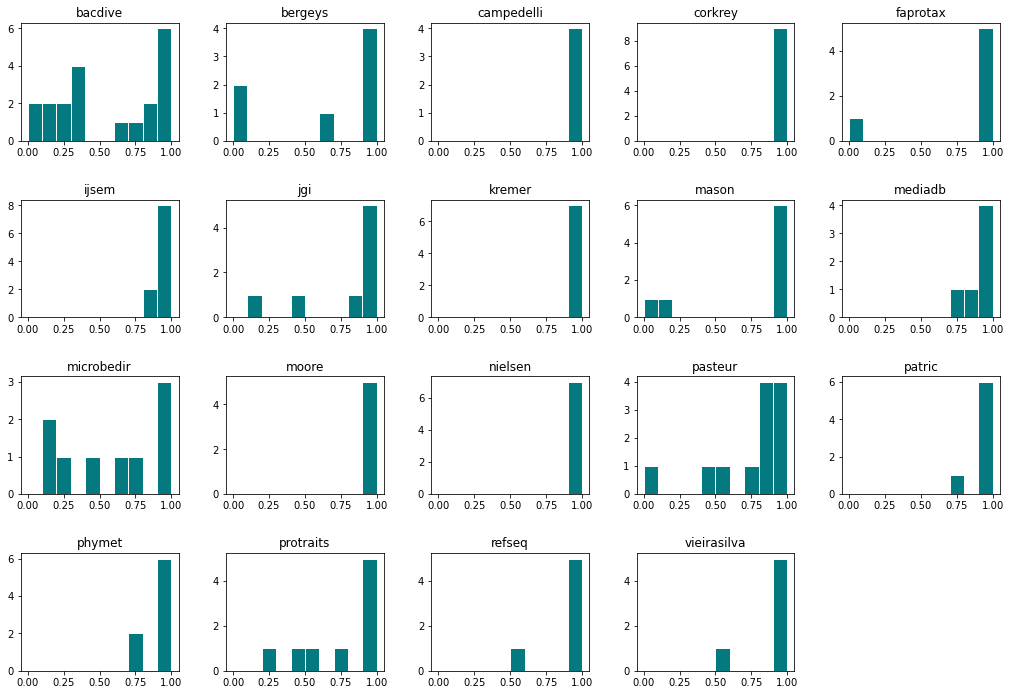

In [8]:
counts.hist(column = 'coverage', by = 'dataset', 
            #sharex = True, 
            #sharey = True, 
            figsize = (17,12), 
            xrot = 0,
            range = (0,1),
            layout = (4,5), 
            color = '#047980',
            edgecolor = 'white'
            )